In [3]:
.;limport tensorflow as tf

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LinearRegression # 지도학습

[[1]
 [2]
 [3]
 [4]
 [5]]


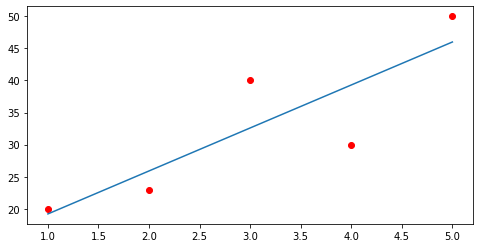

In [32]:
2

In [33]:
# 이진분류 모델 - 로지스틱 회귀

[[ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]]


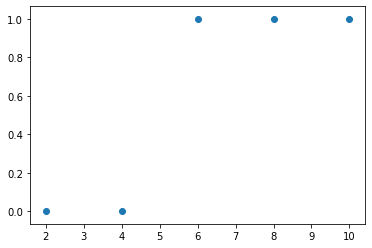

정확도 : 1.0
예측 : [0 0 1 1 1]


In [41]:
# 사이킷런 -> LogisticRegression -> 이진분류(편의상 다중도 지원)

# 공부 시간에 따른 합격, 불합격 -> 0, 1 -> 이진분류
x = np.array([2,4,6,8,10])
x = x.reshape(-1, 1)
print(x)

y = np.array([0,0,1,1,1])

plt.scatter(x,y)
plt.show()

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x,y)

y_score = model.score(x,y)

y_pred = model.predict(x)

print("정확도 : {}".format(y_score))
print("예측 : {}".format(y_pred))

In [49]:
from sklearn.datasets import load_boston # 보스턴 도시 집값 예측 데이터셋

data = load_boston()
x_data = data.data
y_data = data.target
cols = data.feature_names

import pandas as pd

# # DataFrame -> 행렬 차원 -> 2차원
# df = pd.DataFrame(x_data, columns=cols)

print(x_data.shape, y_data.shape)

(506, 13) (506,)


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_score = model.score(x_test, y_test)

y_score

0.6731708373965163

In [59]:
y_pred = model.predict(x_test)
print(y_pred[0], y_test[0])
print(y_pred[1], y_test[1])

18.18022769366989 17.5
28.30418603168424 31.2


In [62]:
# MSE, MAE, RMSE, ... -> 손실함수 [회귀를 위한 평가(손실)함수]

# 평가지표 라이브러리
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred)) # 제곱값

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred)) # 절댓값

3.4270226181461463

In [63]:
# 분류를 위한 평가(손실)함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report # recall, precision, f1-score

In [69]:
# pandas -> csv 불러오기
import pandas as pd

df = pd.read_csv('./dataset/iris.csv')
print(df.head())
print(df.tail())

# 데이터간 상관관계
print(df.corr())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
     sepal.length  sepal.width  petal.length  petal.width    variety
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica
              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
p

In [77]:
x_data = np.array(df.iloc[:, 0:-1])
y_data = np.array(df.iloc[:, -1])

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [80]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

y_data = enc.fit_transform(y_data)

y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 학습 데이터, 테스트 데이터 10%의 비율로 나누기
# LogisticRegression을 활용해서 모델 만들기

# model.score 대신 accuracy_score로 모델 평가
# 생성된 모델의 예측값 출력

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

x_data = data.data
y_data = data.target

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_score(y_pred, y_test)

/opt/anaconda3/envs/ai_learning/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9122807017543859

In [37]:
a = [1,2,3,4,5]
b = [[1], [2] ,[3]]
np_arr = np.array([1,2,3,4,5,6]) # broadcasting 기법
np_arr2 = np_arr.reshape(-1, 2) # -1 -> 자동으로, 1-> 한개
b, np_arr2

([[1], [2], [3]],
 array([[1, 2],
        [3, 4],
        [5, 6]]))

In [20]:
np_arr2.reshape(-1)
# np_arr2.flatten() -> 무조건 1차원 배열로 변환

array([1, 2, 3, 4, 5, 6])